In [ ]:
!pip install imbalanced-learn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import norm
import joblib

# Ensure imblearn is installed
try:
    import imblearn
    from imblearn.over_sampling import SMOTE, ADASYN
    from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
    from imblearn.pipeline import make_pipeline, Pipeline
    from imblearn.combine import SMOTEENN
except ImportError:
    print("Please install imblearn using: pip install imbalanced-learn")

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_predict, cross_val_score, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE



In [ ]:
# Download dataset if not available
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
dataset_path = "creditcard.csv"

if not os.path.exists(dataset_path):
    try:
        df = pd.read_csv(dataset_url)
        df.to_csv(dataset_path, index=False)
        print("Dataset downloaded successfully.")
    except Exception as e:
        print("Error downloading dataset:", e)
else:
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully.")

# Define X (features) and y (labels)
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable (fraud or not fraud)

# Normalize features
robust_scaler = RobustScaler()
X_scaled = robust_scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=33, stratify=y
)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Define models
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42)
]

print("Dataset processed successfully!")

Dataset loaded successfully.
Dataset processed successfully!


In [ ]:
def feature_selection(X, y, threshold=0.1):
    df = pd.concat([pd.DataFrame(X), pd.Series(y, name='Class')], axis=1)
    correlation = df.corr().iloc[:-1, -1].abs().sort_values()
    selected_features = correlation[correlation < threshold].index.tolist()
    return X.drop(selected_features, axis=1)


In [ ]:
df = pd.read_csv(dataset_path)
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

robust_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33, stratify=y
)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Apply ADASYN for another resampling method
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)


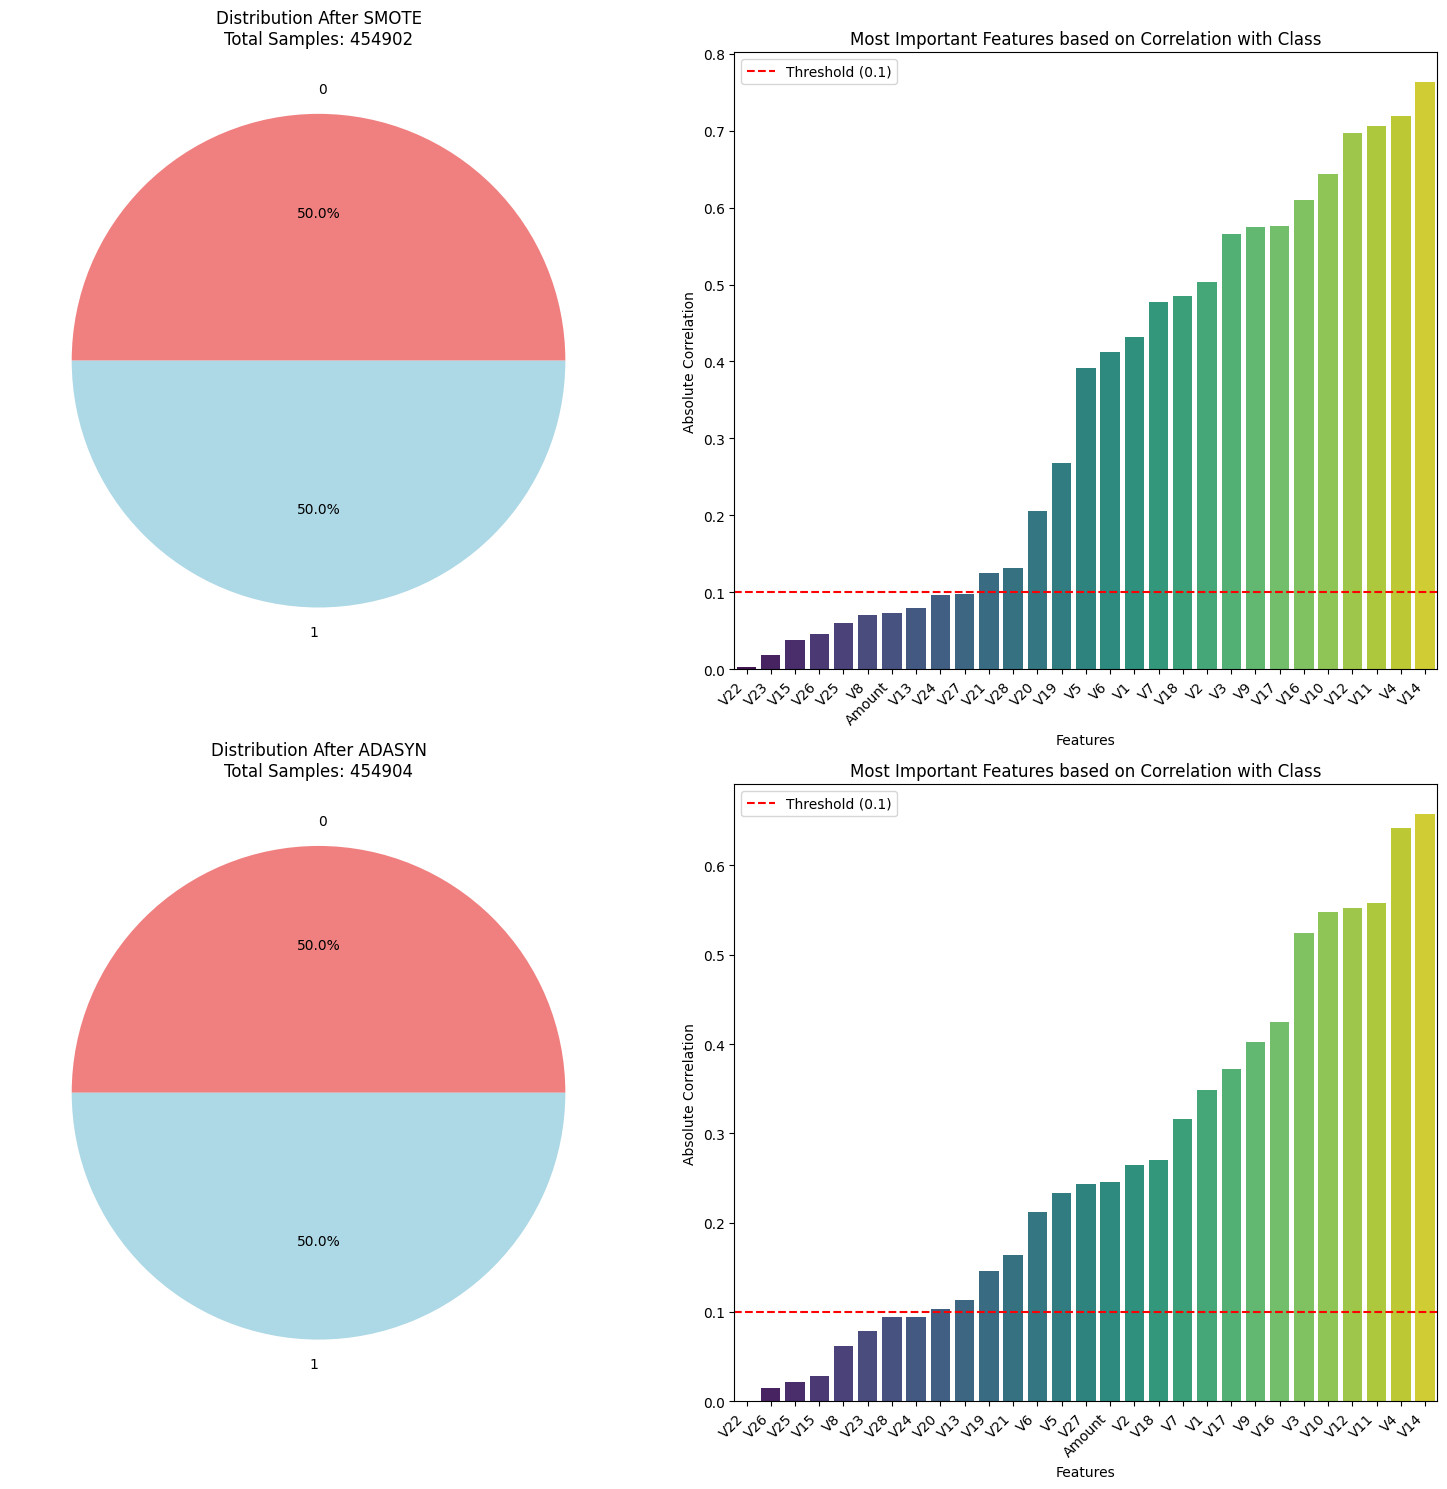

In [ ]:
class_counts_after_smote = Counter(y_train_SMOTE)
class_counts_after_adasyn = Counter(y_train_ADASYN)
corr_threshold = 0.1

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.pie(class_counts_after_smote.values(), labels=class_counts_after_smote.keys(), autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution After SMOTE\nTotal Samples: {}'.format(sum(class_counts_after_smote.values())))

plt.subplot(2, 2, 2)
SMOTE_df = pd.concat([pd.DataFrame(X_train_SMOTE, columns=X.columns), pd.Series(y_train_SMOTE, name='Class')], axis=1)
correlation = SMOTE_df.corr()['Class'].abs().sort_values()
correlation = correlation[correlation.index != 'Class']
sns.barplot(x=correlation.index, y=correlation.values, hue=correlation.index, palette='viridis')
plt.title('Most Important Features based on Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=corr_threshold, color='red', linestyle='--', label=f'Threshold ({corr_threshold})')
plt.legend()

plt.subplot(2, 2, 3)
plt.pie(class_counts_after_adasyn.values(), labels=class_counts_after_adasyn.keys(), autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution After ADASYN\nTotal Samples: {}'.format(sum(class_counts_after_adasyn.values())))

plt.subplot(2, 2, 4)
ADASYN_df = pd.concat([pd.DataFrame(X_train_ADASYN, columns=X.columns), pd.Series(y_train_ADASYN, name='Class')], axis=1)
correlation = ADASYN_df.corr()['Class'].abs().sort_values()
correlation = correlation[correlation.index != 'Class']
sns.barplot(x=correlation.index, y=correlation.values, hue=correlation.index, palette='viridis')
plt.title('Most Important Features based on Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=corr_threshold, color='red', linestyle='--', label=f'Threshold ({corr_threshold})')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(dataset_url)

# Split features and target
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable

# Standardize features (important for models like KNN & Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Debugging: Check resampled data
print("X_train_SMOTE shape:", X_train_SMOTE.shape)
print("y_train_SMOTE distribution:", Counter(y_train_SMOTE))

# Define Stratified K-Fold for consistent evaluation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Perform cross-validation for each model
results = {}
for name, model in models.items():
    print(f"\nRunning {name}...")
    try:
        scores = cross_val_score(model, X_train_SMOTE, y_train_SMOTE, cv=stratified_kfold, scoring='accuracy')
        results[name] = scores.mean()
        print(f"{name} Cross-validation accuracy: {scores.mean()*100:.2f}%")
    except Exception as e:
        print(f"Error in {name}: {e}")

print("\nAll models evaluated successfully!")


X_train_SMOTE shape: (454902, 30)
y_train_SMOTE distribution: Counter({0: 227451, 1: 227451})

Running Logistic Regression...
Logistic Regression Cross-validation accuracy: 95.23%

Running K-Nearest Neighbors...
K-Nearest Neighbors Cross-validation accuracy: 99.88%

Running Random Forest...
Random Forest Cross-validation accuracy: 99.99%

All models evaluated successfully!


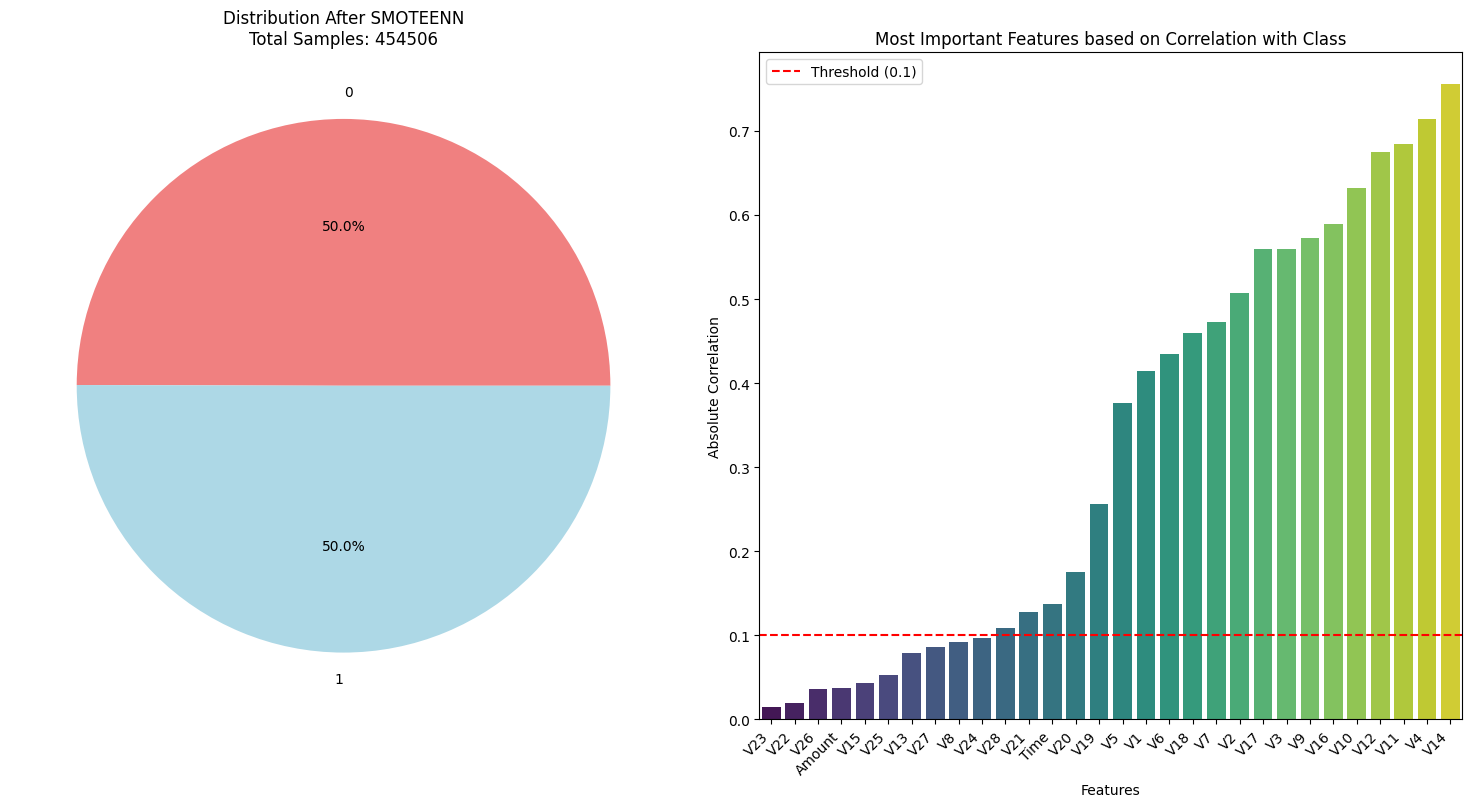

In [ ]:
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Apply SMOTEENN for resampling
smoteenn = SMOTEENN(random_state=42)
X_train_SMOTEENN, y_train_SMOTEENN = smoteenn.fit_resample(X_train, y_train)

# Count class distribution after SMOTEENN
class_counts_after_SMOTEENN = Counter(y_train_SMOTEENN)
corr_threshold = 0.1

# Plot distribution
plt.figure(figsize=(15, 15))

# Pie chart for class distribution
plt.subplot(2, 2, 1)
plt.pie(class_counts_after_SMOTEENN.values(), labels=class_counts_after_SMOTEENN.keys(), autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title(f'Distribution After SMOTEENN\nTotal Samples: {sum(class_counts_after_SMOTEENN.values())}')

# Correlation with class
plt.subplot(2, 2, 2)
SMOTEENN_df = pd.concat([pd.DataFrame(X_train_SMOTEENN, columns=X.columns), pd.Series(y_train_SMOTEENN, name='Class')], axis=1)
correlation = SMOTEENN_df.corr()['Class'].abs().sort_values()
correlation = correlation[correlation.index != 'Class']

# Bar plot for feature importance
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Most Important Features based on Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=corr_threshold, color='red', linestyle='--', label=f'Threshold ({corr_threshold})')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN

# Apply SMOTEENN for resampling
smoteenn = SMOTEENN(random_state=42)
X_train_SMOTEENN, y_train_SMOTEENN = smoteenn.fit_resample(X_train, y_train)

# Perform cross-validation for each model
resultsSMOTEENN = {}
for name, model in models.items():
    print(f"\nRunning {name} with SMOTEENN...")
    try:
        scores = cross_val_score(model, X_train_SMOTEENN, y_train_SMOTEENN, cv=stratified_kfold, scoring='accuracy')
        resultsSMOTEENN[name] = scores.mean() * 100  # Convert to percentage
        print(f"{name} Cross-validation accuracy with SMOTEENN: {scores.mean() * 100:.2f}%")
    except Exception as e:
        print(f"Error in {name}: {e}")

print("\nAll models evaluated successfully with SMOTEENN!")


In [ ]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
knn = KNeighborsClassifier(weights='distance')
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb =XGBClassifier(scale_pos_weight=1 / 0.17, random_state=42)

models = [lr, knn, rf, xgb]

In [ ]:
voting_classifier.fit(X_train, y_train)

In [ ]:
prediction = voting_classifier.predict(X_test_scaled)

In [ ]:
report = classification_report(y_test, prediction, digits=4)

print("Classification Report:\n", report)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, prediction)).plot()